## part of the code based on https://nbviewer.jupyter.org/github/rmotr/color-extractor-service/blob/master/demo/Extract%20colors%20from%20images.ipynb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import random 
import scipy
import skimage
import skimage.io
import os
import skimage.transform
from PIL import Image
from collections import Counter
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
#!pip install colour

You are using pip version 8.1.1, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [51]:
#!pip install webcolors

You are using pip version 8.1.1, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## show color pattern just for one image

In [3]:
def get_one_image(folder):
    global img
    img_dir="{}/".format(folder)
    m=os.listdir("{}/".format(folder))
    for i in range(len(m)):
        if m[i]!= ".DS_Store":
            title=random.choice(m)
            img = skimage.io.imread(os.path.join(img_dir, title))
            img_vector = img.reshape((img.shape[0] * img.shape[1], 3)) 
            return img_vector, title

In [6]:
img_vector1,title=get_one_image("hopper_img/")

In [7]:
CLUSTERS = 10
def kmeans1(vector):
    model = KMeans(n_clusters=CLUSTERS)
    labels = model.fit_predict(vector)
    label_counts = Counter(labels)
    rgb_colors=(model.cluster_centers_)
    return label_counts, rgb_colors, model.cluster_centers_

In [8]:
label_counts1, rgb_colors1, cluster_centers_1=kmeans1(img_vector1)

In [9]:
import webcolors
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

actual_namel=[]
closest_namel=[]
for i in range(len(rgb_colors1)):
        requested_colour = (rgb_colors1[i])
        actual_name, closest_name = get_colour_name(requested_colour)
        actual_namel.append(actual_name)
        closest_namel.append(closest_name)


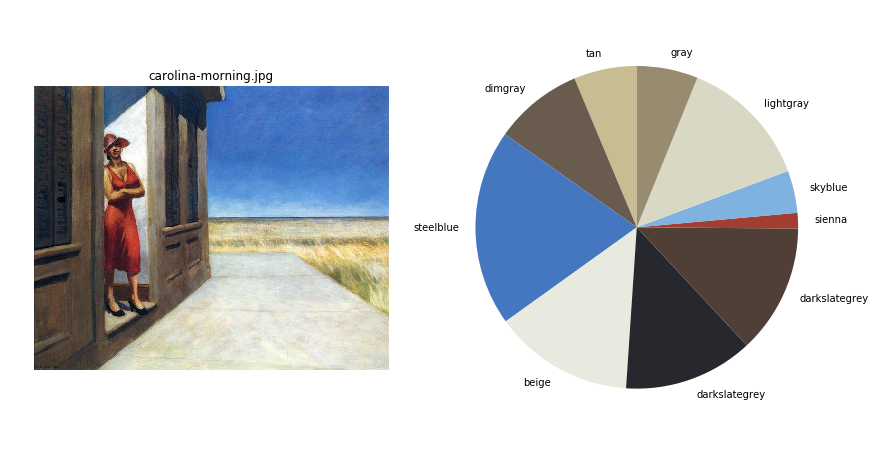

In [10]:
plt.figure(figsize=(14, 8))
plt.subplot(121)
plt.imshow(img)
plt.title(title)
plt.axis('off')

plt.subplot(122)
plt.pie(np.array(list(label_counts1.values())), labels=closest_namel, colors=[color/255 for color in cluster_centers_1], startangle=90)
plt.axis('equal')
plt.show()

## show color pattern after calculating all image

In [11]:
img_wid = 128
img_len = 128
img_channels = 3 


def resize_img(file):
    img = skimage.io.imread(os.path.join(img_dir, file))
    img = skimage.transform.resize(img, (img_wid, img_len), mode='reflect')

    return img[:,:,:img_channels]

In [13]:
t_m=os.listdir('hopper_img/')

In [15]:
hlist=[]
for i in range(len(t_m)):
    img_dir="hopper_img/"
    if t_m[i]!= ".DS_Store":
        #img = skimage.io.imread(os.path.join(img_dir, hopper_m[i]))
        img=resize_img(t_m[i])
        hlist.append(img)

In [16]:
im=np.vstack(hlist)

In [17]:
img_vector = im.reshape((im.shape[0] * im.shape[1], 3))

In [18]:
def kmeans2(vector):
    model = KMeans(n_clusters=CLUSTERS)
    labels = model.fit_predict(vector)
    label_counts = Counter(labels)
    rgb_colors=(model.cluster_centers_*255)
    return label_counts, rgb_colors, model.cluster_centers_

In [19]:
label_counts12, rgb_colors2, cluster_centers_2=kmeans2(img_vector)

In [20]:
#Code based on fraxel https://stackoverflow.com/questions/9694165/convert-rgb-color-to-english-color-name-like-green-with-python

actual_namel2=[]
closest_namel2=[]
for i in range(len(rgb_colors2)):
        requested_colour = (rgb_colors2[i])
        actual_name, closest_name = get_colour_name(requested_colour)
        actual_namel2.append(actual_name)
        closest_namel2.append(closest_name)


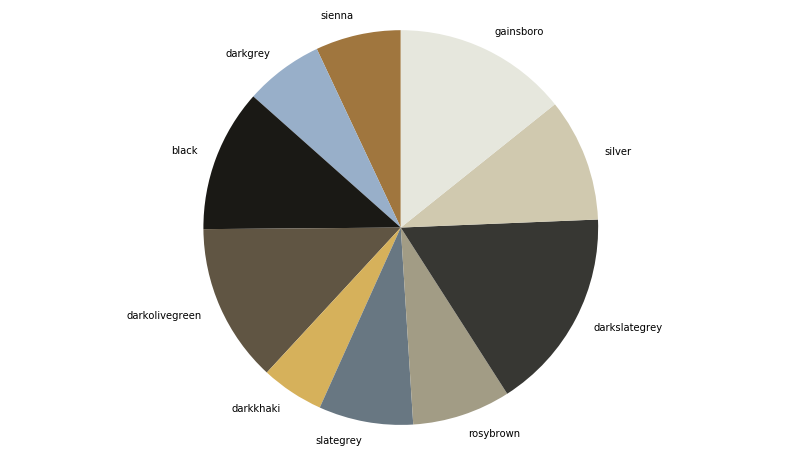

In [21]:
plt.figure(figsize=(14, 8))
plt.pie(np.array(list(label_counts12.values())), labels=closest_namel2, colors=[color for color in cluster_centers_2], startangle=90)
plt.axis('equal')
plt.show()